<h1 style="font-size: 60px; font-weight: bold">Dengue Data Analysis</h1>
<h2>2016-2020</h2>

<h1 style="font-size: 35px; font-weight: bold;">#1. Data Preparation</h1>
<h2>Analyst: Aerbhert John Sanchez</h2>

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from IPython.display import display, HTML
from IPython.display import display, Markdown
import warnings
warnings.filterwarnings("ignore")

In [2]:
def print(*args, sep=' ', end='\n', **kwargs):
    output = sep.join(map(str, args)) + end
    styled_output = f'<p style="font-size: 20px; font-weight: bold">{output}</p>'
    display(HTML(styled_output))

In [3]:
dengue=pd.read_csv("datasets/dengue.csv")

In [4]:
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [5]:
dengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          1020 non-null   object
 1   Year           1020 non-null   int64 
 2   Region         1020 non-null   object
 3   Dengue_Cases   1020 non-null   int64 
 4   Dengue_Deaths  1020 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 40.0+ KB


<h1 style="font-size: 35px; font-weight: bold";>#2 Data Cleansing</h1>

In [6]:
dengue["Month"]=dengue["Month"].astype("category")
dengue["Year"]=dengue["Year"].astype("category")
dengue["Region"]=dengue["Region"].astype("category")

In [7]:
dengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Month          1020 non-null   category
 1   Year           1020 non-null   category
 2   Region         1020 non-null   category
 3   Dengue_Cases   1020 non-null   int64   
 4   Dengue_Deaths  1020 non-null   int64   
dtypes: category(3), int64(2)
memory usage: 20.3 KB


In [8]:
dengue['mortality']= (dengue['Dengue_Deaths']/dengue['Dengue_Cases'] * 100)

In [9]:
dengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Month          1020 non-null   category
 1   Year           1020 non-null   category
 2   Region         1020 non-null   category
 3   Dengue_Cases   1020 non-null   int64   
 4   Dengue_Deaths  1020 non-null   int64   
 5   mortality      1020 non-null   float64 
dtypes: category(3), float64(1), int64(2)
memory usage: 28.3 KB


<h1 style="font-size: 35px; font-weight: bold";>#3 Insights</h1>

<h1 style="font-size: 20px; font-weight: bold";>1. Distribution of Dengue Cases.</h1>

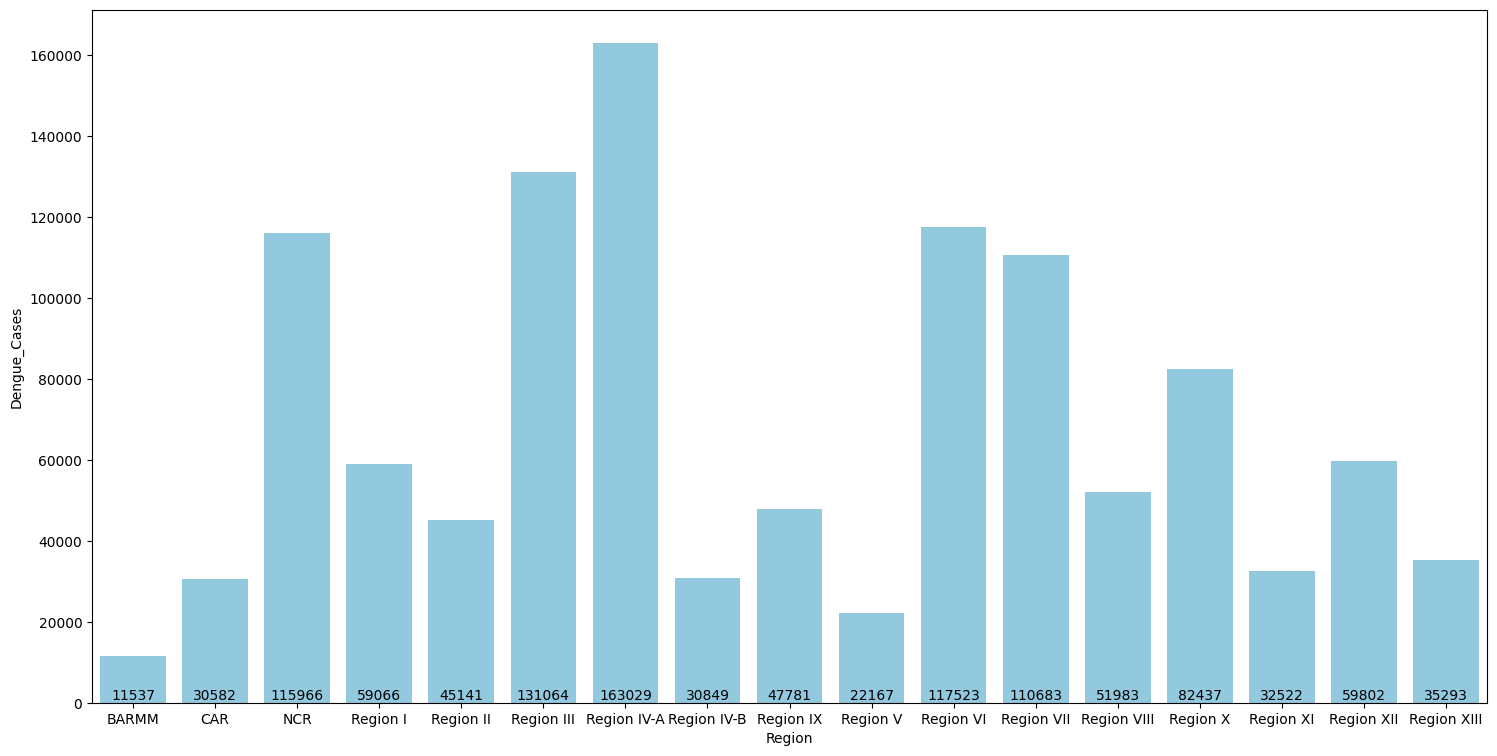

In [10]:
region_sum = dengue.groupby('Region')['Dengue_Cases'].sum().reset_index()
ax = sns.barplot(data=region_sum,x='Region',y='Dengue_Cases',color='skyblue')

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, 0, int(p.get_height()), ha='center', va='bottom',color='black',fontsize=10)
plt.gcf().set_size_inches(18,9)
plt.show()

In [11]:
display(Markdown(
    f"The highest number of Dengue cases is from **Region 4-A** which is **163029** cases."
))

The highest number of Dengue cases is from **Region 4-A** which is **163029** cases.

<h1 style="font-size: 20px; font-weight: bold";>2. Distribution of Dengue Deaths</h1>

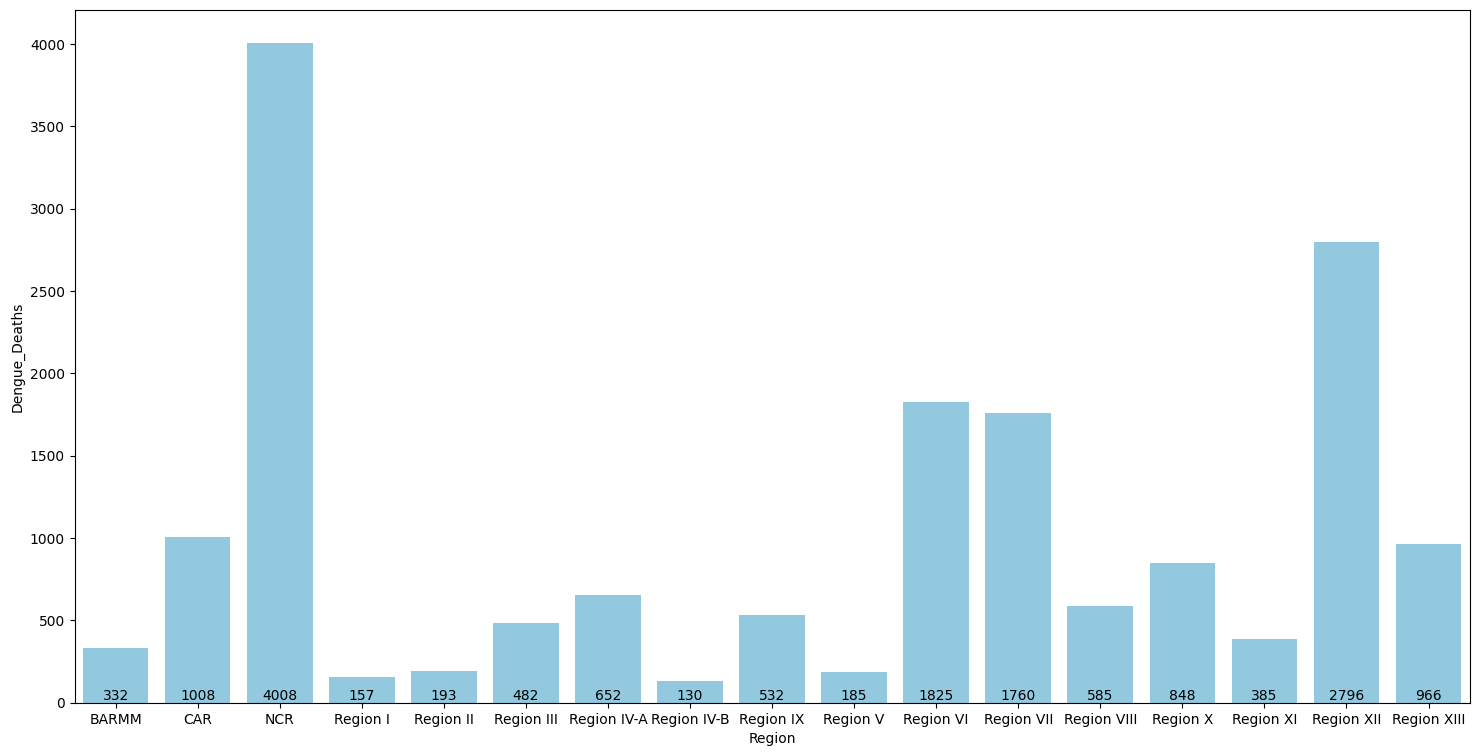

In [12]:
region_deaths = dengue.groupby('Region')['Dengue_Deaths'].sum().reset_index()
ax = sns.barplot(data=region_deaths,x='Region',y='Dengue_Deaths',color='skyblue')

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, 0, int(p.get_height()), ha='center', va='bottom',color='black',fontsize=10)
plt.gcf().set_size_inches(18,9)
plt.show()

In [13]:
display(Markdown(
    f"The highest number of Dengue Deaths is from **NCR** which is **4008** cases."
))

The highest number of Dengue Deaths is from **NCR** which is **4008** cases.

<h1 style="font-size: 20px; font-weight: bold";>3. Distribution of Mortality</h1>

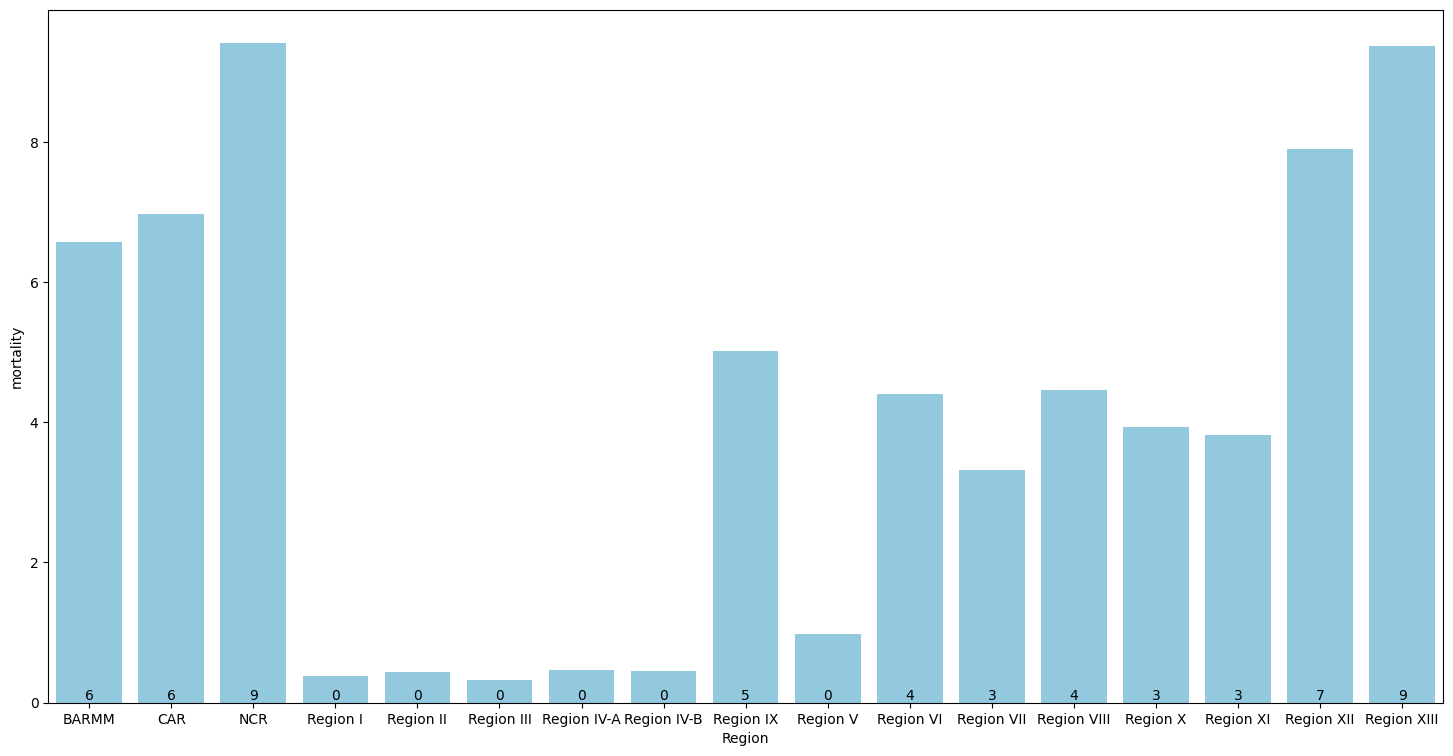

In [14]:
region_mortality= dengue.groupby('Region')['mortality'].mean().reset_index()
ax = sns.barplot(data=region_mortality,x='Region',y='mortality',color='skyblue')

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, 0, int(p.get_height()), ha='center', va='bottom',color='black',fontsize=10)
plt.gcf().set_size_inches(18,9)
plt.show()

In [15]:
display(Markdown(
    f"The highest number of mortality rate is from **NCR** and **Region 13** which is both **9%**."
))

The highest number of mortality rate is from **NCR** and **Region 13** which is both **9%**.

<h1 style="font-size: 20px; font-weight: bold";> 4. Cases per Month</h1>

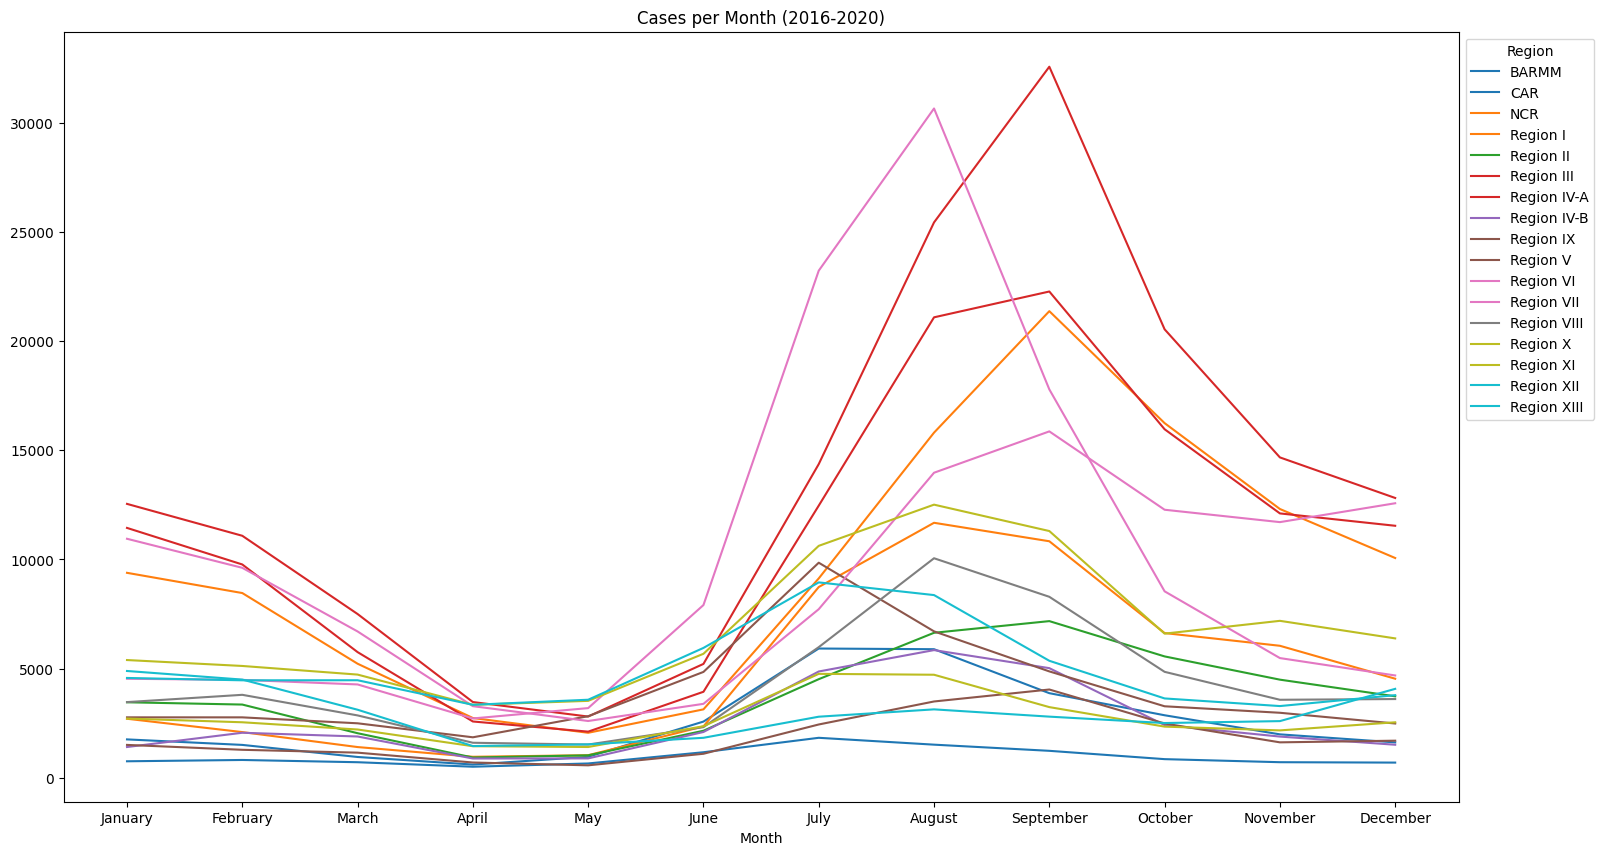

In [16]:
month_order = ["January","February","March","April","May","June","July","August","September","October","November","December"]
dengue["Month"]=pd.Categorical(dengue["Month"],categories=month_order,ordered=True)
monthly_cases = dengue.groupby(['Month','Region'])["Dengue_Cases"].sum()

monthly_cases_unstacked = monthly_cases.unstack()

# Define colors for each region 
regions = monthly_cases_unstacked.columns
colors = plt.cm.get_cmap("tab10", len(regions)) 

# different colors for each region
monthly_cases_unstacked.plot(kind='line', color=colors(range(len(regions))))

plt.title("Cases per Month (2016-2020)")
plt.gcf().set_size_inches(18,10)
plt.xticks(range(0,12),month_order)
plt.legend(title='Region', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [17]:
month_cases = dengue.groupby('Month')['Dengue_Cases'].sum()
highest_month = month_cases.idxmax()

In [18]:
print(f"{highest_month} has the highest number of cases per months")

<h1 style="font-size: 20px; font-weight: bold";> 5. Death per Month</h1>

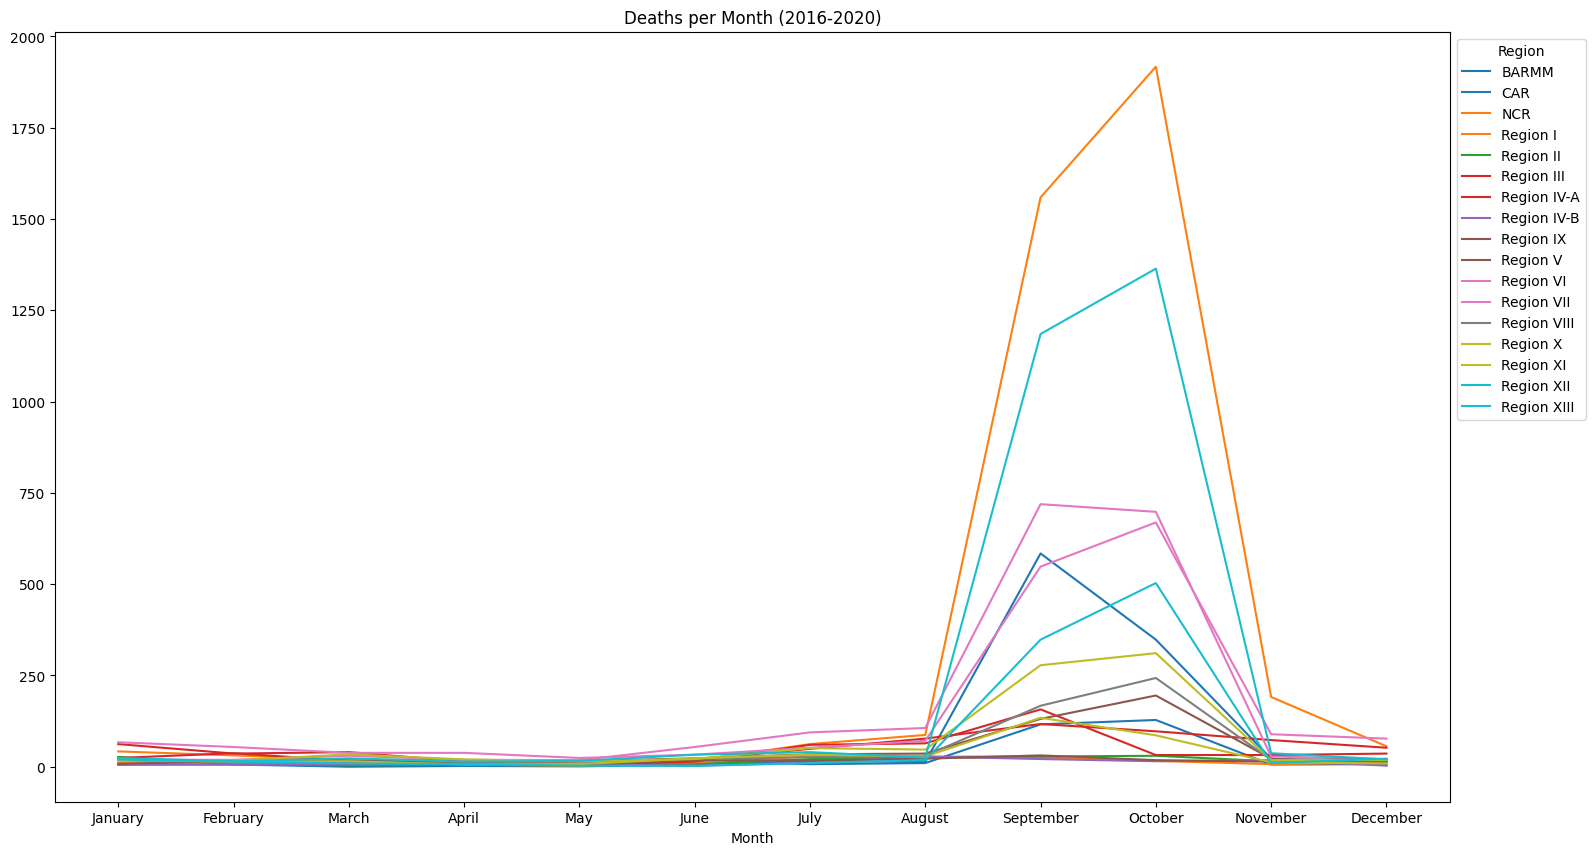

In [19]:
monthly_deaths = dengue.groupby(['Month','Region'])["Dengue_Deaths"].sum()

monthly_deaths_unstacked = monthly_deaths.unstack()

# Define colors for each region 
regions = monthly_deaths_unstacked.columns
colors = plt.cm.get_cmap("tab10", len(regions)) 

# different colors for each region
monthly_deaths_unstacked.plot(kind='line', color=colors(range(len(regions))))

plt.title("Deaths per Month (2016-2020)")
plt.gcf().set_size_inches(18,10)
plt.xticks(range(0,12),month_order)
plt.legend(title='Region', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [20]:
month_deaths = dengue.groupby('Month')['Dengue_Deaths'].sum()
highest_month_death = month_deaths.idxmax()

In [21]:
print(f"{highest_month_death} has the highest deaths from dengue of all months.")

<h1 style="font-size: 20px; font-weight: bold";> 6. mortality per Month</h1>

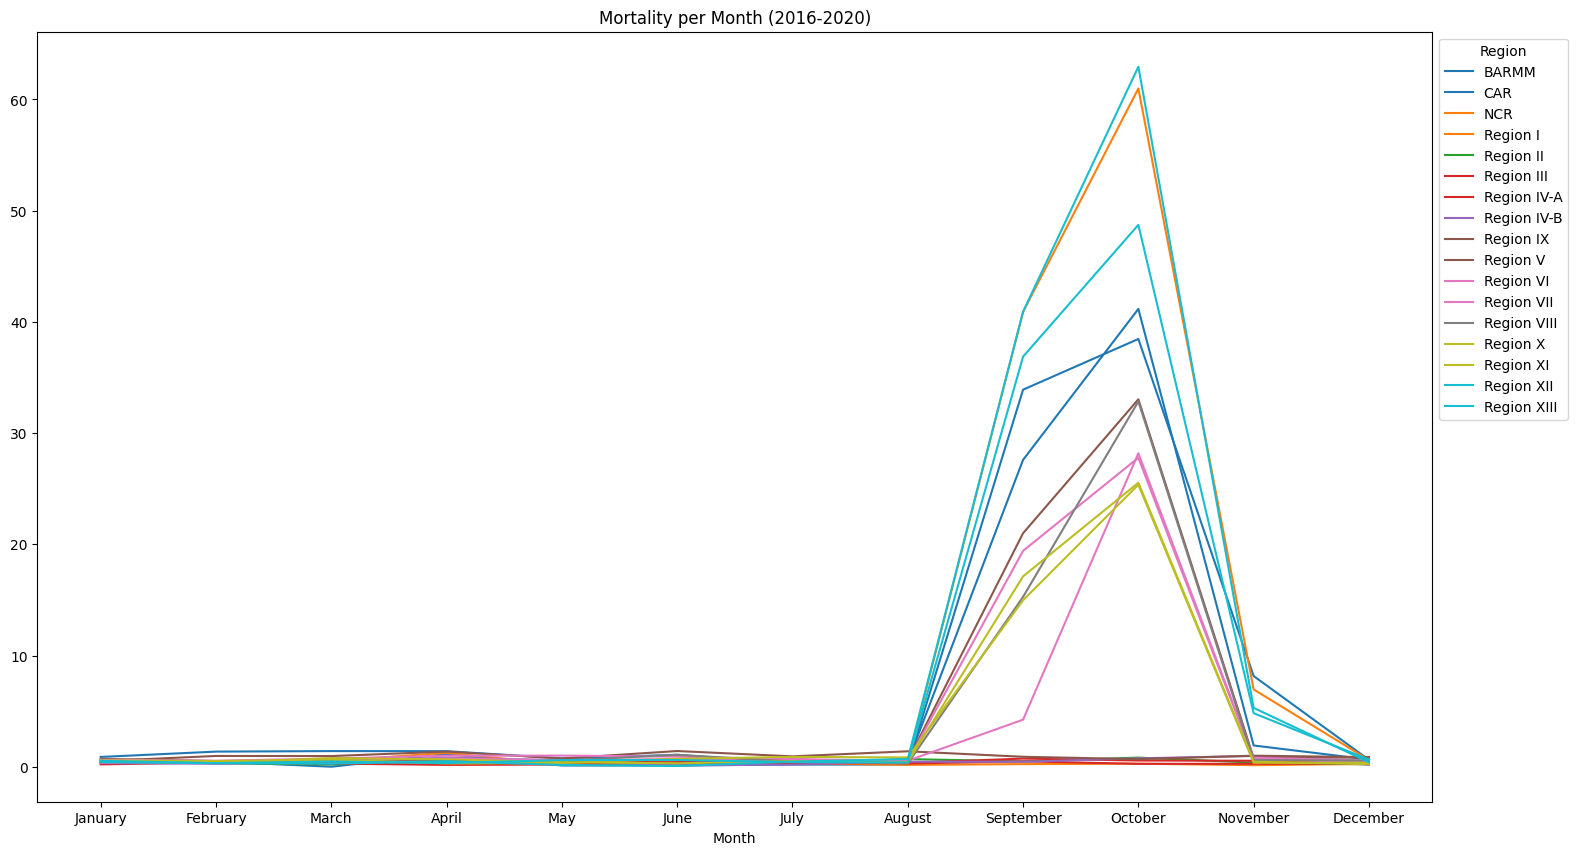

In [22]:
monthly_mortality = dengue.groupby(['Month','Region'])["mortality"].mean()

monthly_mortality_unstacked = monthly_mortality.unstack()

# Define colors for each region 
regionsmortality = monthly_mortality_unstacked.columns
colors_mortality = plt.cm.get_cmap("tab10", len(regionsmortality)) 

# different colors for each region
monthly_mortality_unstacked.plot(kind='line', color=colors_mortality(range(len(regionsmortality))))

plt.title("Mortality per Month (2016-2020)")
plt.gcf().set_size_inches(18,10)
plt.xticks(range(0,12),month_order)
plt.legend(title='Region', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [23]:
month_mortality = dengue.groupby('Month')['mortality'].mean()
highest_month_mortality = month_mortality.idxmax()
highest_month_mortality_percent = month_mortality.max()


In [24]:
print(f"{highest_month_mortality} has the highest mortality rate in all months reaching {np.round(highest_month_mortality_percent,1)}%.")

<h1 style="font-size: 20px; font-weight: bold";> 7. Cases per Year</h1>

([<matplotlib.axis.XTick at 0x23e0913d090>,
 [Text(2016, 0, '2016'),
  Text(2017, 0, '2017'),
  Text(2018, 0, '2018'),
  Text(2019, 0, '2019'),
  Text(2020, 0, '2020')])

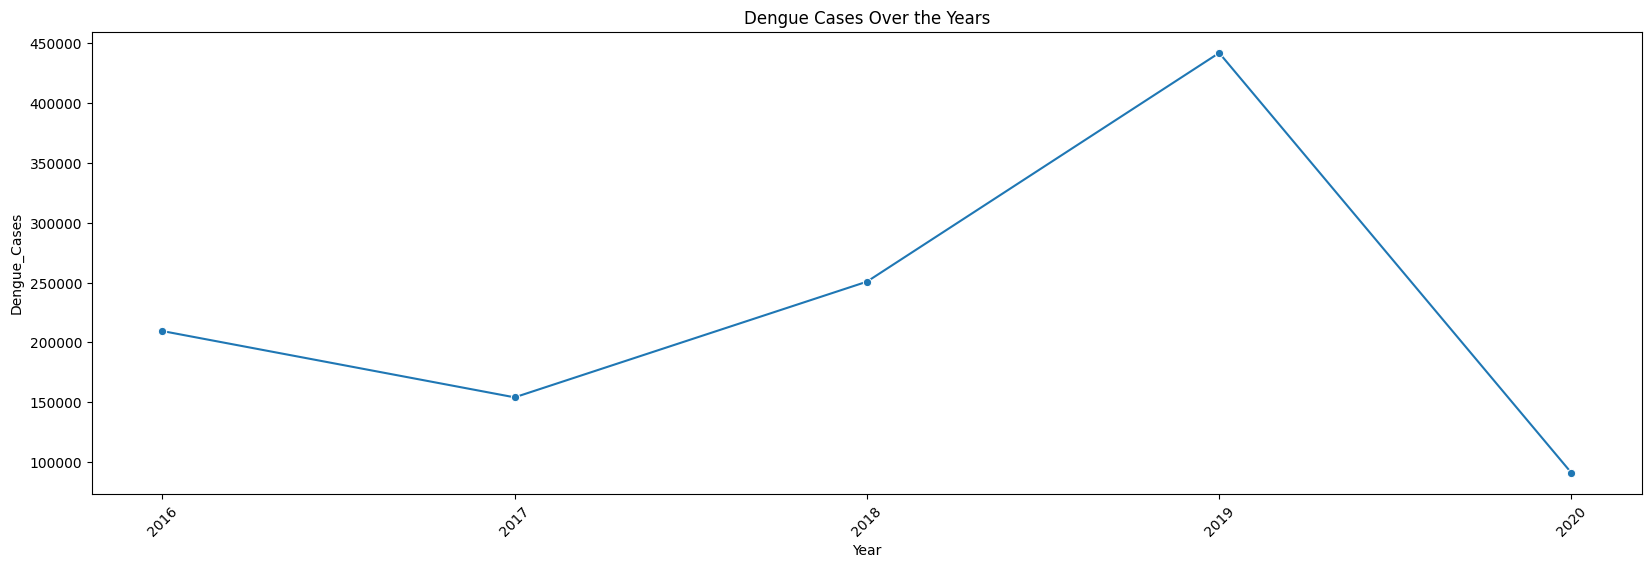

In [25]:
year_cases_plot= dengue.groupby('Year')['Dengue_Cases'].sum().reset_index()
plt.figure(figsize=(20, 6))
sns.lineplot(data=year_cases_plot, x='Year', y='Dengue_Cases', marker='o')
plt.title('Dengue Cases Over the Years')
plt.xticks(rotation=45,ticks=year_cases_plot['Year'], labels=year_cases_plot['Year'].astype(int))

In [26]:
year_cases = dengue.groupby('Year')['Dengue_Cases'].sum()
highest_year_cases = year_cases.idxmax()
highest_year_cases_percent = year_cases.max()


In [27]:
print(f"{highest_year_cases} has the highest cases in all years reaching {np.round(highest_year_cases_percent,1)}.")

<h1 style="font-size: 20px; font-weight: bold";> 8. Deaths per Year</h1>

([<matplotlib.axis.XTick at 0x23e08855e50>,
 [Text(2016, 0, '2016'),
  Text(2017, 0, '2017'),
  Text(2018, 0, '2018'),
  Text(2019, 0, '2019'),
  Text(2020, 0, '2020')])

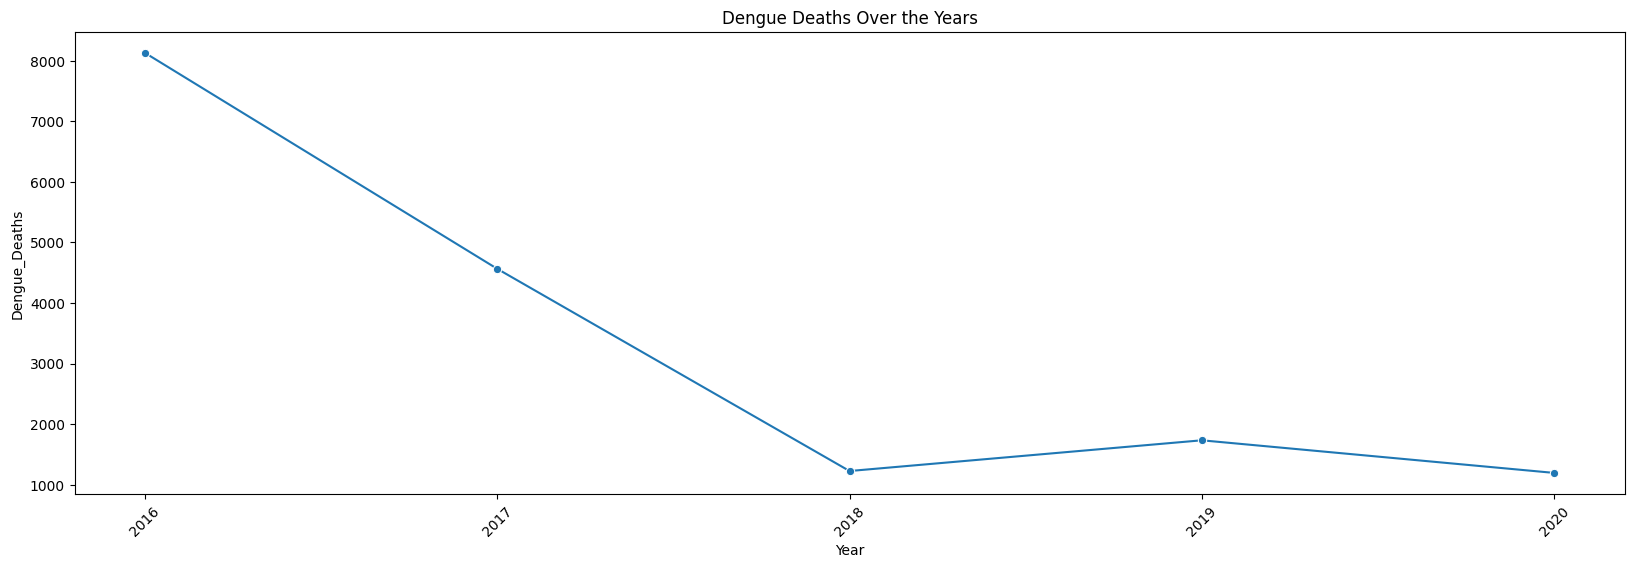

In [28]:
year_deaths_plot= dengue.groupby('Year')['Dengue_Deaths'].sum().reset_index()
plt.figure(figsize=(20, 6))
sns.lineplot(data=year_deaths_plot, x='Year', y='Dengue_Deaths', marker='o')
plt.title('Dengue Deaths Over the Years')
plt.xticks(rotation=45,ticks=year_deaths_plot['Year'], labels=year_deaths_plot['Year'].astype(int))

In [29]:
year_deaths = dengue.groupby('Year')['Dengue_Deaths'].sum()
highest_year_deaths = year_deaths.idxmax()
highest_year_deaths_percent = year_deaths.max()


In [30]:
print(f"{highest_year_deaths} has the highest deaths in all years reaching {np.round(highest_year_deaths_percent,1)}.")

<h1 style="font-size: 20px; font-weight: bold";> 9. Mortality rate per Year</h1>

([<matplotlib.axis.XTick at 0x23e091e7f90>,
 [Text(2016, 0, '2016'),
  Text(2017, 0, '2017'),
  Text(2018, 0, '2018'),
  Text(2019, 0, '2019'),
  Text(2020, 0, '2020')])

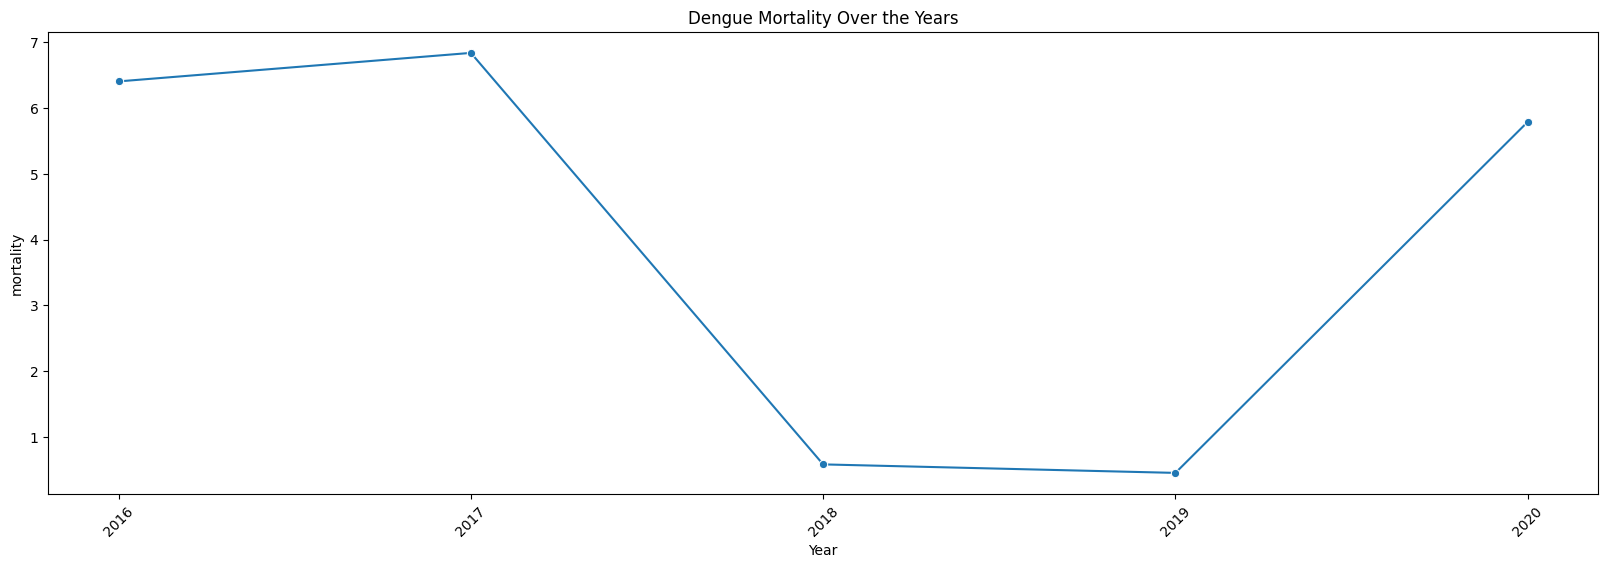

In [31]:
year_mortality_plot= dengue.groupby('Year')['mortality'].mean().reset_index()
plt.figure(figsize=(20, 6))
sns.lineplot(data=year_mortality_plot, x='Year', y='mortality', marker='o')
plt.title('Dengue Mortality Over the Years')
plt.xticks(rotation=45,ticks=year_mortality_plot['Year'], labels=year_mortality_plot['Year'].astype(int))


In [32]:
year_mortality = dengue.groupby('Year')['mortality'].mean()
highest_year_mortality = year_mortality.idxmax()
highest_year_mortality_percent = year_mortality.max()

In [33]:
print(f"{highest_year_mortality} has the highest mortality rate in all years reaching {np.round(highest_year_mortality_percent,1)}%.")

<h1 style="font-size: 40px; font-weight: bold";>Region 4A</h1>

<h1 style="font-size: 20px; font-weight: bold";> 10. Cases in Region 4-A</h1>

In [34]:
Region_4_A = dengue[dengue["Region"]=="Region IV-A"]


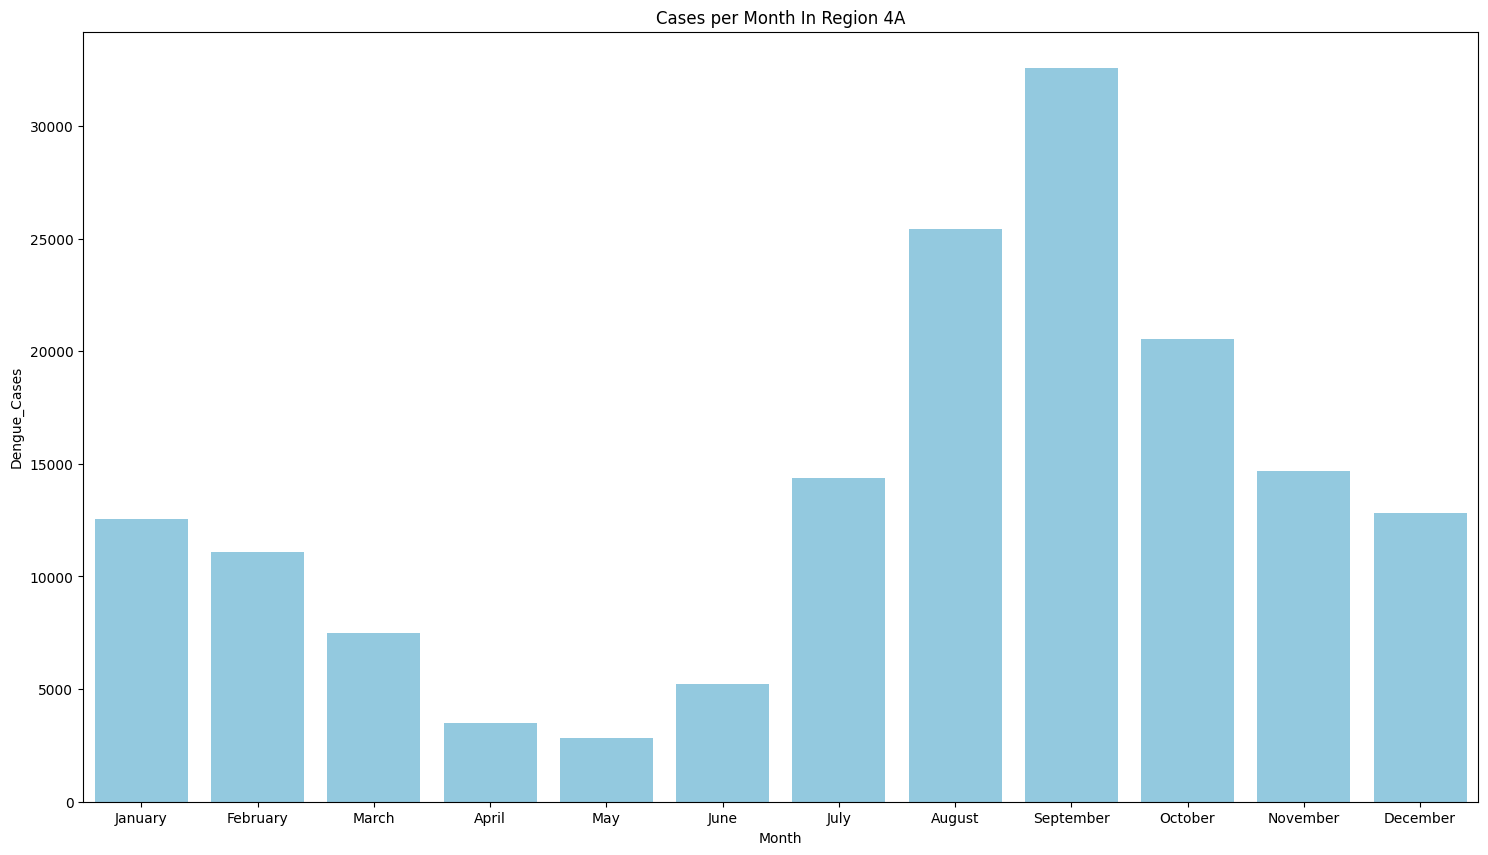

In [35]:
month_cases_4A= Region_4_A.groupby('Month')['Dengue_Cases'].sum().reset_index()
sns.barplot(data=month_cases_4A, x='Month', y='Dengue_Cases',color='skyblue')
plt.title("Cases per Month In Region 4A")
plt.gcf().set_size_inches(18,10)
plt.show()

In [36]:
month_cases_4A = Region_4_A.groupby('Month')['Dengue_Cases'].sum()
highest_month_cases_4A = month_cases_4A.idxmax()
highest_month_cases_4A_percent = month_cases_4A.max()

In [37]:
print(f"{highest_month_cases_4A} has the highest cases in all months in Region 4-A reaching {highest_month_cases_4A_percent}.")

<h1 style="font-size: 20px; font-weight: bold";> 11. Deaths in Region 4-A</h1>

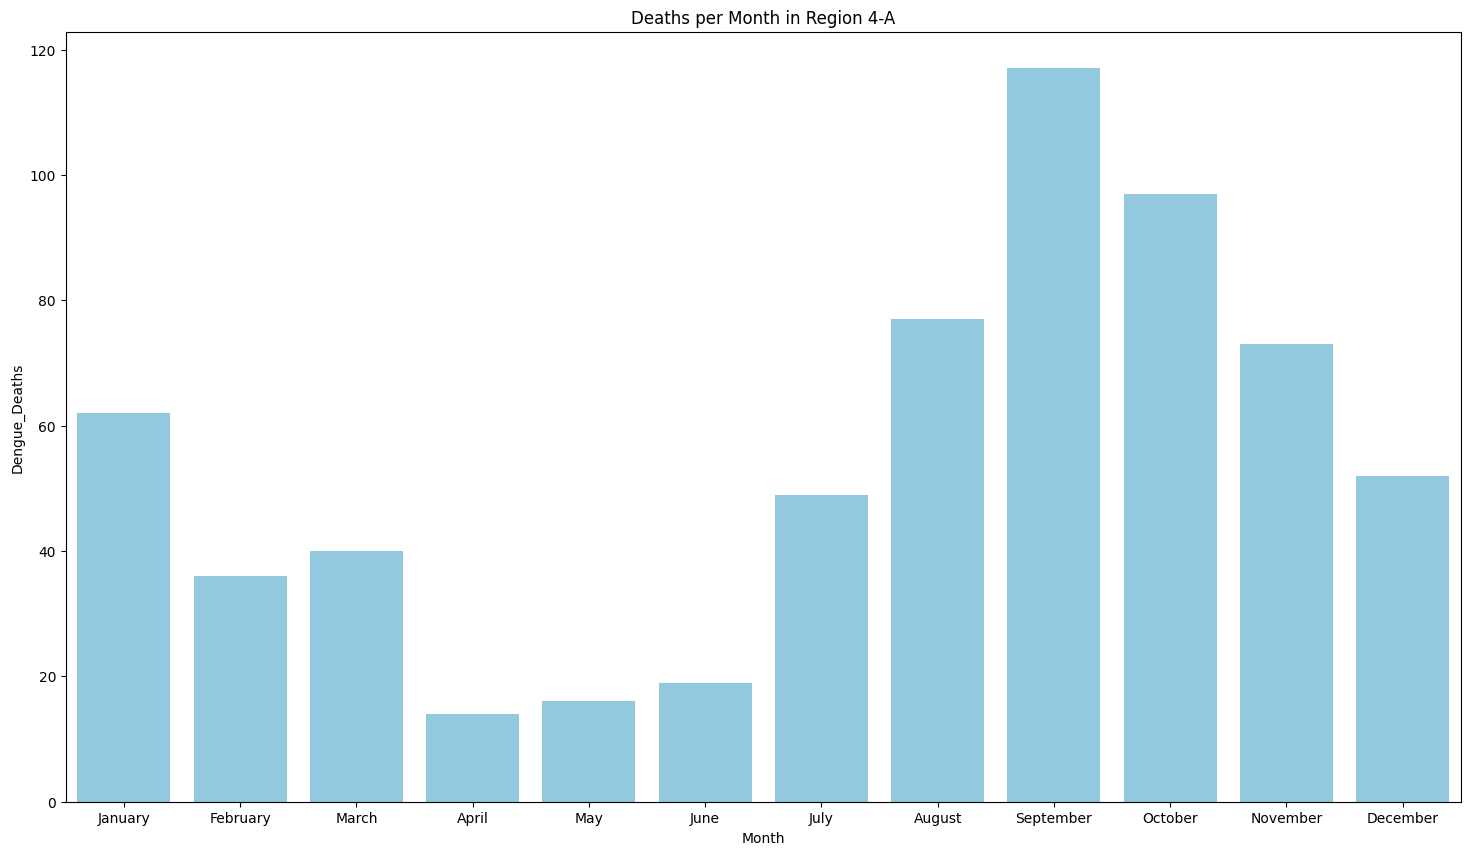

In [38]:
month_deaths_4A= Region_4_A.groupby('Month')['Dengue_Deaths'].sum().reset_index()
sns.barplot(data=month_deaths_4A, x='Month', y='Dengue_Deaths',color='skyblue')
plt.title("Deaths per Month in Region 4-A")
plt.gcf().set_size_inches(18,10)
plt.show()

In [39]:
month_deaths_4A = Region_4_A.groupby('Month')['Dengue_Deaths'].sum()
highest_month_deaths_4A = month_deaths_4A.idxmax()
highest_month_deaths_4A_percent = month_deaths_4A.max()

In [40]:
print(f"{highest_month_deaths_4A} has the highest deaths in all months in Region 4-A reaching {highest_month_deaths_4A_percent}.")

<h1 style="font-size: 20px; font-weight: bold";> 12. Mortality in Region 4-A</h1>

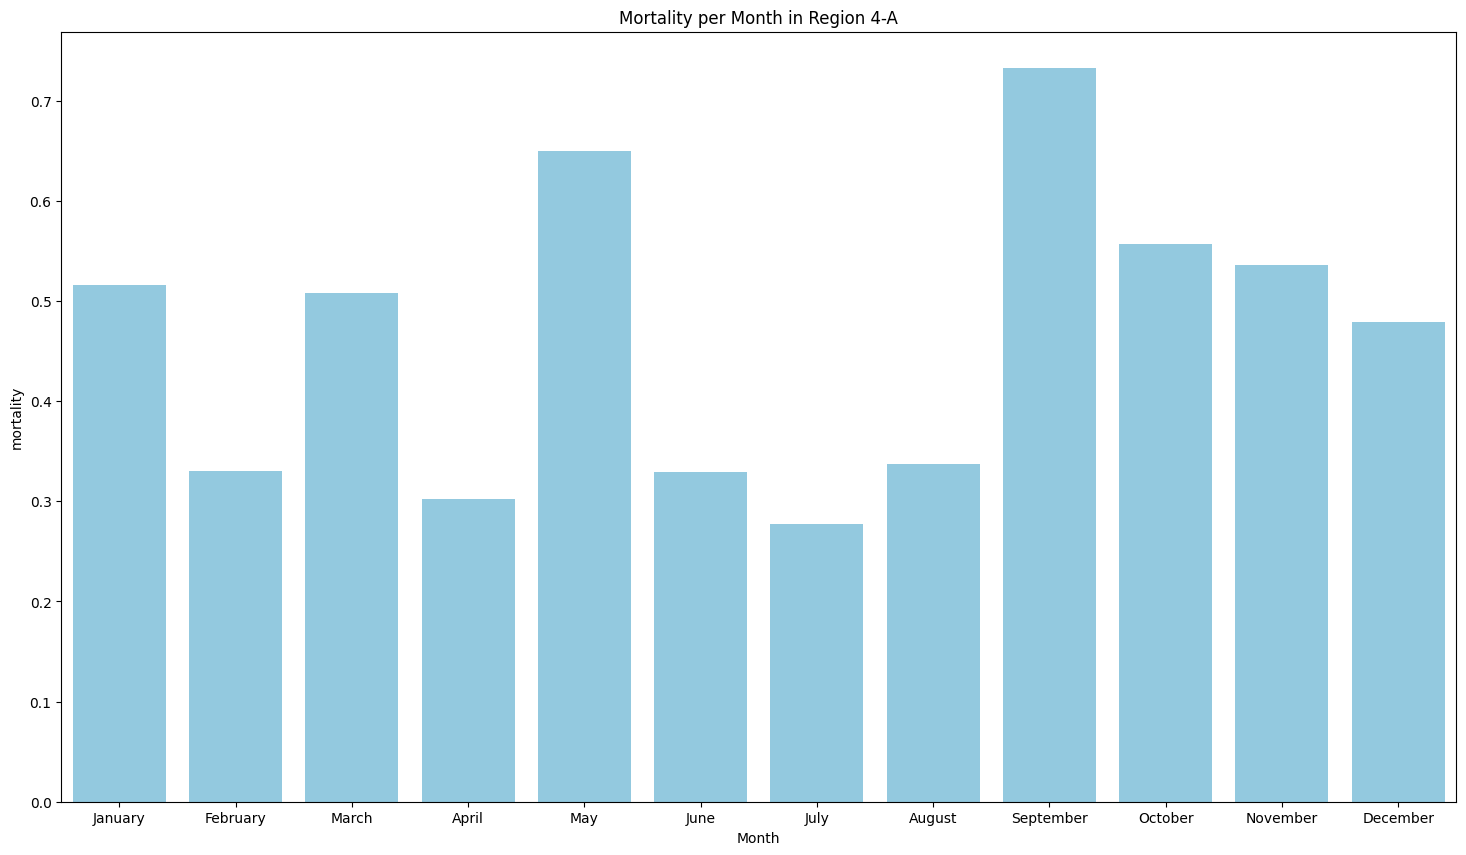

In [41]:
month_mortality_4A= Region_4_A.groupby('Month')['mortality'].mean().reset_index()
sns.barplot(data=month_mortality_4A, x='Month', y='mortality',color='skyblue')
plt.title("Mortality per Month in Region 4-A")
plt.gcf().set_size_inches(18,10)
plt.show()

In [42]:
month_mortality_4A = Region_4_A.groupby('Month')['mortality'].mean()
highest_mortality_4A = month_mortality_4A.idxmax()
highest_mortality_4A_percent = month_mortality_4A.max()

In [43]:
print(f"{highest_mortality_4A} has the highest mortality rate in all months in Region 4-A reaching {np.round(highest_mortality_4A_percent,2)}%.")

<h1 style="font-size: 20px; font-weight: bold";> 13. Cases per year in Region 4-A</h1>

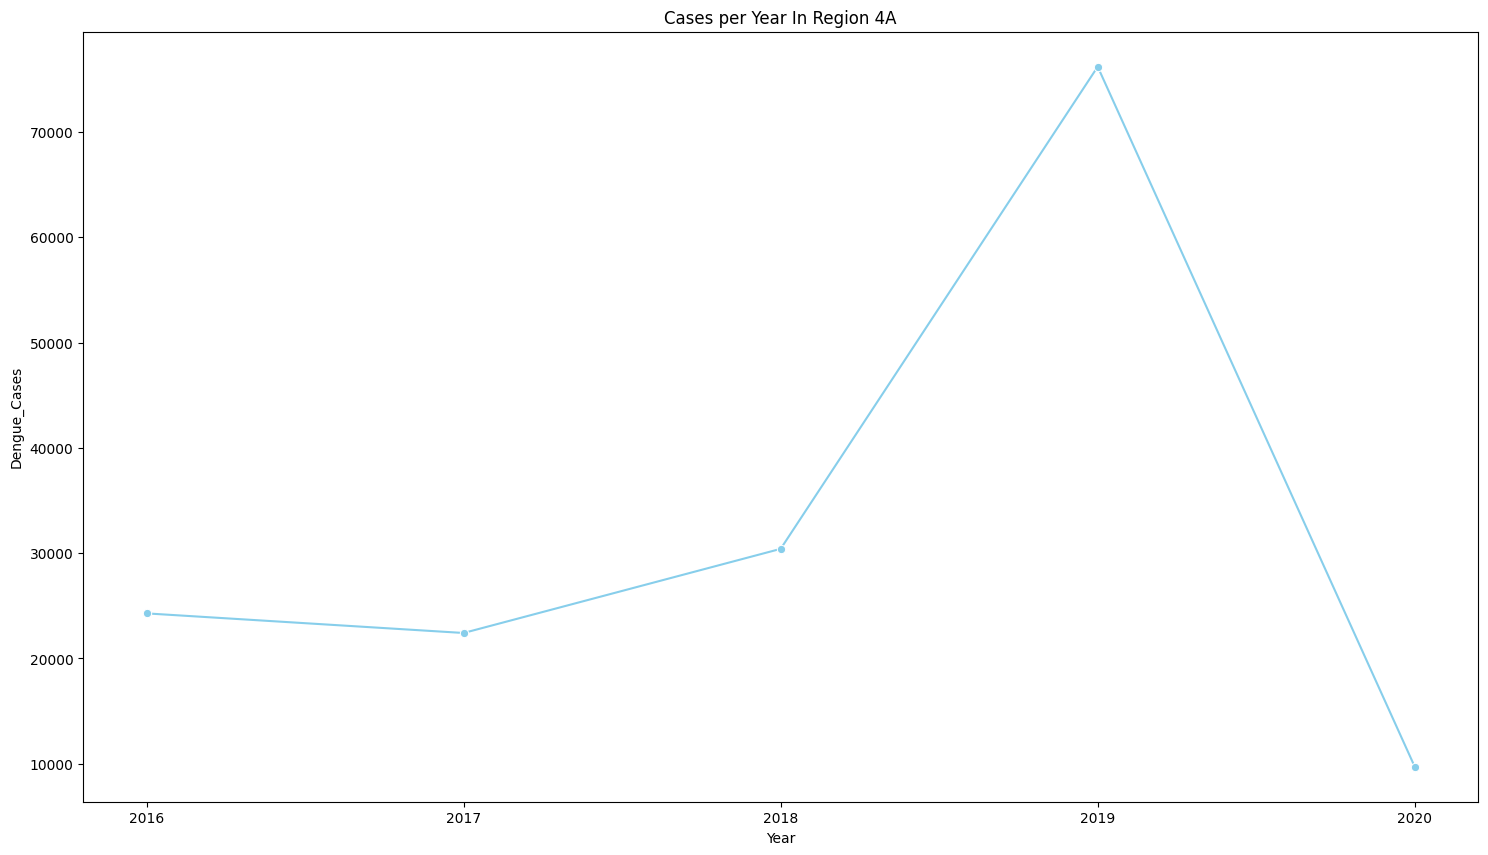

In [44]:
year_cases_4A= Region_4_A.groupby('Year')['Dengue_Cases'].sum().reset_index()
sns.lineplot(data=year_cases_4A, x='Year', y='Dengue_Cases',color='skyblue',marker="o")
plt.title("Cases per Year In Region 4A")
plt.gcf().set_size_inches(18,10)
plt.xticks(ticks=year_cases_4A['Year'], labels=year_cases_4A['Year'].astype(int))
plt.show()

In [45]:
year_cases_4A = Region_4_A.groupby('Year')['Dengue_Cases'].sum()
highest_year_cases_4A = year_cases_4A.idxmax()
highest_year_cases_4A_percent = year_cases_4A.max()

In [46]:
print(f"{highest_year_cases_4A} has the highest cases in all years in Region 4-A reaching {highest_year_cases_4A_percent}")

<h1 style="font-size: 20px; font-weight: bold";> 14. Deaths per year in Region 4-A</h1>

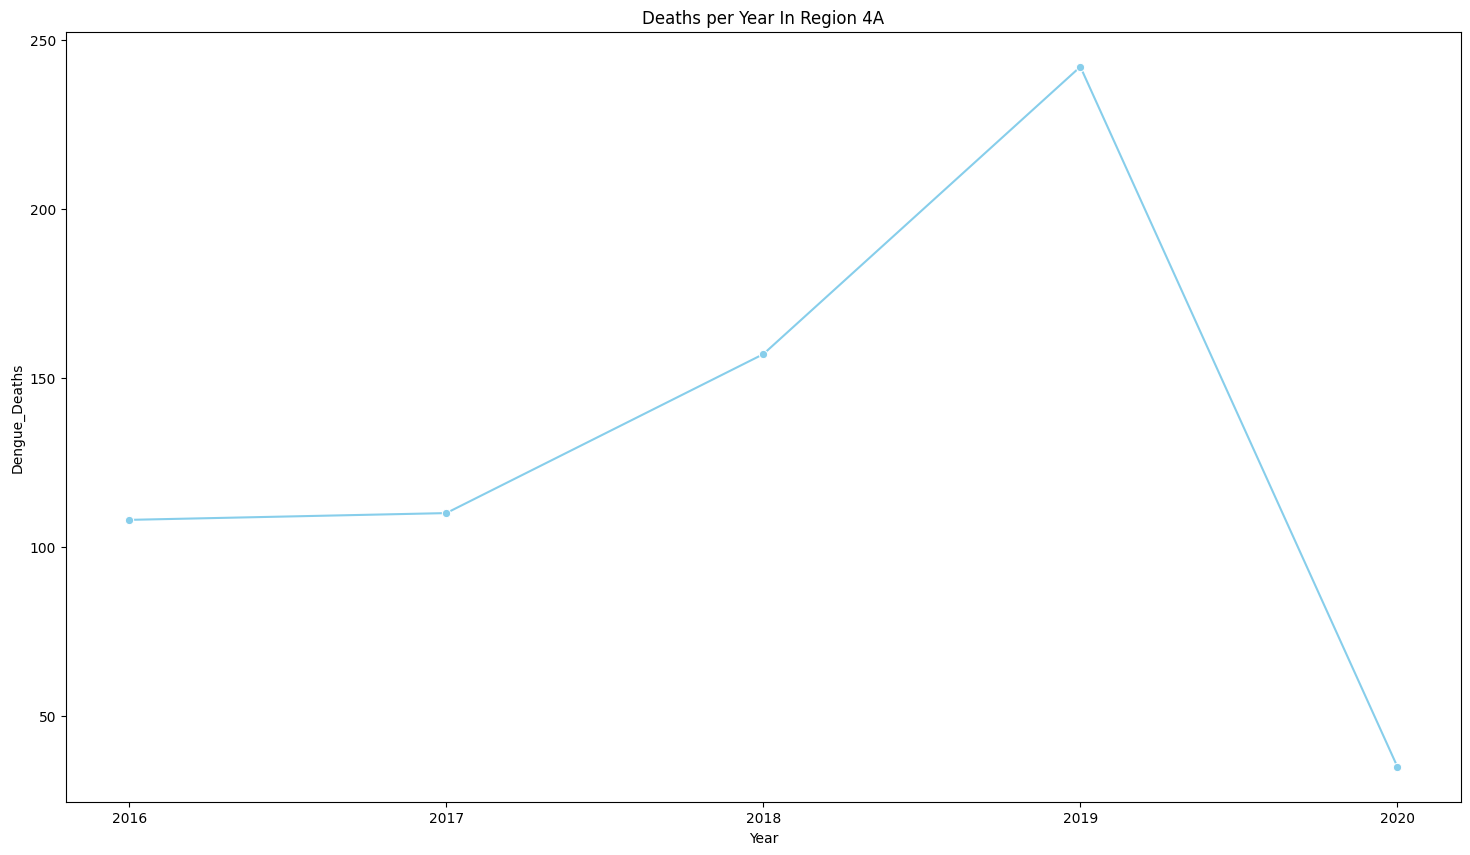

In [47]:
year_deaths_4A= Region_4_A.groupby('Year')['Dengue_Deaths'].sum().reset_index()
sns.lineplot(data=year_deaths_4A, x='Year', y='Dengue_Deaths',color='skyblue',marker="o")
plt.title("Deaths per Year In Region 4A")
plt.xticks(ticks=year_deaths_4A['Year'], labels=year_deaths_4A['Year'].astype(int))
plt.gcf().set_size_inches(18,10)
plt.show()

In [48]:
year_deaths_4A = Region_4_A.groupby('Year')['Dengue_Deaths'].sum()
highest_year_deaths_4A = year_deaths_4A.idxmax()
highest_year_deaths_4A_percent = year_deaths_4A.max()
year_deaths_4A.sum()

652

In [49]:
print(f"{highest_year_deaths_4A} has the highest cases in all years in Region 4-A reaching {highest_year_deaths_4A_percent}. which is {np.round(242/652*100)}% of total cases.")

<h1 style="font-size: 20px; font-weight: bold";> 15. Mortality per year in Region 4-A</h1>

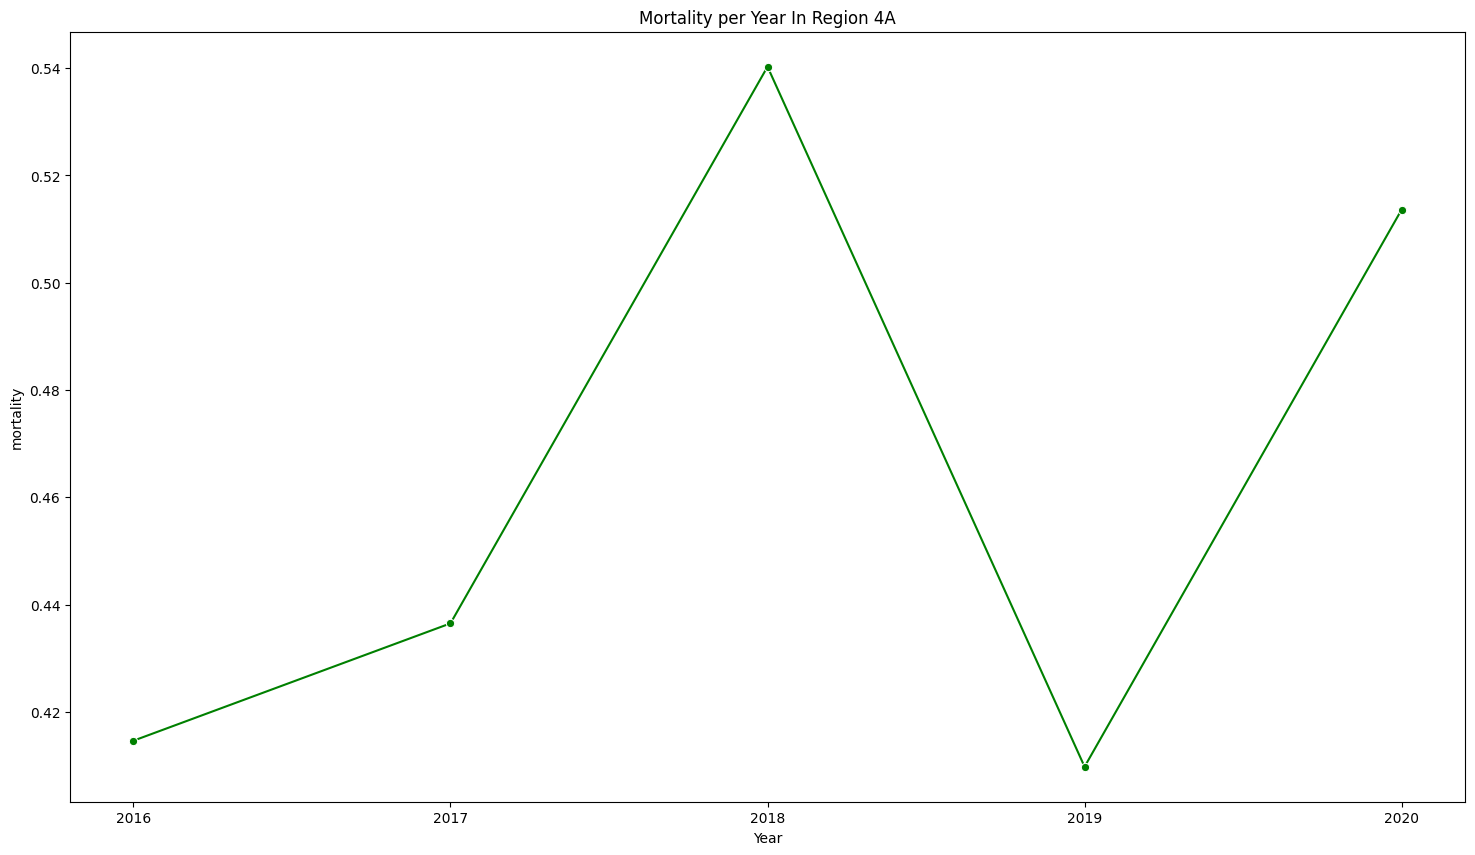

In [50]:
year_mortality_4A= Region_4_A.groupby('Year')['mortality'].mean().reset_index()
sns.lineplot(data=year_mortality_4A, x='Year', y='mortality',color='green',marker="o")
plt.title("Mortality per Year In Region 4A")
plt.gcf().set_size_inches(18,10)
plt.xticks(ticks=year_mortality_4A['Year'], labels=year_mortality_4A['Year'].astype(int))
plt.show()

In [51]:
year_mortality_4A = Region_4_A.groupby('Year')['mortality'].mean()
highest_year_mortality_4A = year_mortality_4A.idxmax()
highest_year_mortality_4A_percent = year_mortality_4A.max()


In [52]:
print(f"{highest_year_mortality_4A} has the highest mortality rate in all years in Region 4-A reaching {np.round(highest_year_mortality_4A_percent,1)}%.")

<h1>Analysis</h1>

<h1 style="font-size: 20px; font-weight: bold";> 16. Distribution of Cases and Deaths in Region 4-A</h1>

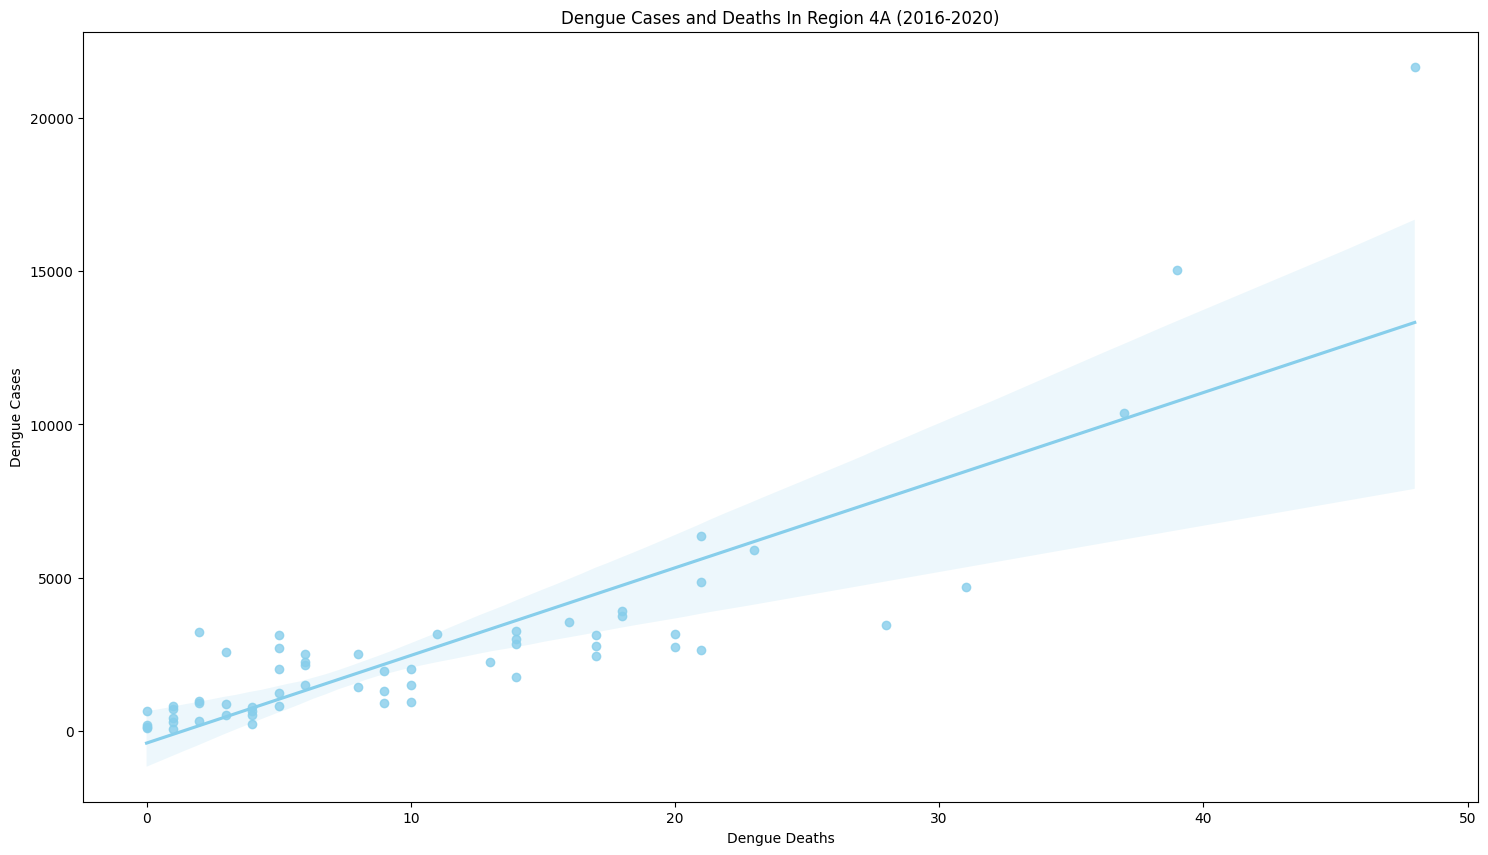

In [57]:
sns.regplot(data=Region_4_A, x='Dengue_Deaths', y='Dengue_Cases',color='skyblue')
plt.title("Dengue Cases and Deaths In Region 4A (2016-2020)")
plt.xlabel("Dengue Deaths")
plt.ylabel("Dengue Cases")
plt.gcf().set_size_inches(18,10)
plt.show()

In [64]:
correlation_4A = Region_4_A['Dengue_Deaths'].corr(Region_4_A['Dengue_Cases'])
print(f"There is a strong positive correlation {correlation_4A:.2f} \n"
      "between dengue cases and deaths in Region 4A from 2016 to 2020.\n"
      "This means that in years with higher dengue cases,\n"
      "the number of deaths also tended to be higher.")


<h1 style="font-size: 20px; font-weight: bold";> 17. Heatmap in Region 4-A</h1>

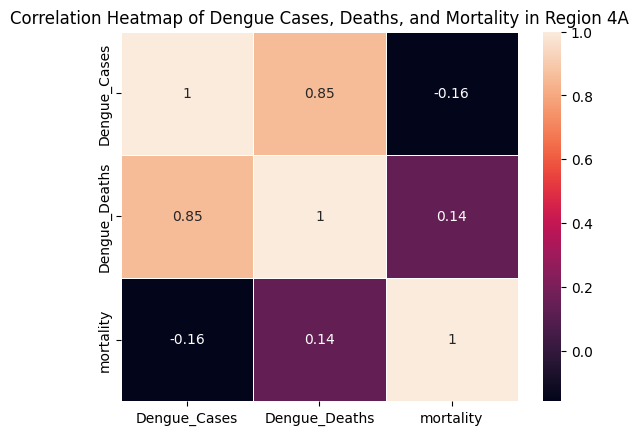

In [73]:

Region4A_data = Region_4_A[['Dengue_Cases', 'Dengue_Deaths', 'mortality']]
Region4A_data_matrix = Region4A_data.corr()
sns.heatmap(Region4A_data_matrix, annot=True, linewidths=0.5)
plt.title("Correlation Heatmap of Dengue Cases, Deaths, and Mortality in Region 4A")
plt.show()

In [76]:
markdown_text = """
### Conclusion:

- **Dengue Cases vs Dengue Deaths (0.85)**:  
  There is a strong positive correlation between the number of dengue cases and dengue deaths. This suggests that in years with higher dengue cases, the number of deaths tends to increase proportionally.

- **Dengue Cases vs Mortality (-0.16)**:  
  There is a slight negative correlation between dengue cases and mortality. This implies that as the number of cases increases, the mortality rate tends to decrease slightly. This could suggest that larger outbreaks might lead to better preventive measures or treatment, or it could be due to more widespread healthcare response.

- **Dengue Deaths vs Mortality (0.14)**:  
  The correlation between dengue deaths and mortality is weak but positive. While higher deaths might slightly increase the mortality rate, the correlation is not strong, indicating that factors other than the number of deaths, such as healthcare quality, might influence the mortality rate more significantly.
"""
display(Markdown(markdown_text))


### Conclusion:

- **Dengue Cases vs Dengue Deaths (0.85)**:  
  There is a strong positive correlation between the number of dengue cases and dengue deaths. This suggests that in years with higher dengue cases, the number of deaths tends to increase proportionally.

- **Dengue Cases vs Mortality (-0.16)**:  
  There is a slight negative correlation between dengue cases and mortality. This implies that as the number of cases increases, the mortality rate tends to decrease slightly. This could suggest that larger outbreaks might lead to better preventive measures or treatment, or it could be due to more widespread healthcare response.

- **Dengue Deaths vs Mortality (0.14)**:  
  The correlation between dengue deaths and mortality is weak but positive. While higher deaths might slightly increase the mortality rate, the correlation is not strong, indicating that factors other than the number of deaths, such as healthcare quality, might influence the mortality rate more significantly.


<h1 style="font-size: 20px; font-weight: bold";> 18. One-way Anova in Region 4-A</h1>

In [90]:
Region_4_A_2016 = np.round(Region_4_A[Region_4_A['Year'] == '2016']['Dengue_Cases'], 1)
Region_4_A_2017 = np.round(Region_4_A[Region_4_A['Year'] == '2017']['Dengue_Cases'], 1)
Region_4_A_2018 = np.round(Region_4_A[Region_4_A['Year'] == '2018']['Dengue_Cases'], 1)
Region_4_A_2019 = np.round(Region_4_A[Region_4_A['Year'] == '2019']['Dengue_Cases'], 1)
Region_4_A_2020 = np.round(Region_4_A[Region_4_A['Year'] == '2020']['Dengue_Cases'], 1)

# Perform ANOVA for all years
cv, p_value = f_oneway(Region_4_A_2016, Region_4_A_2017, Region_4_A_2018, Region_4_A_2019, Region_4_A_2020)

# Check cv (F-statistic) and provide output
if cv > 0.5:
    print("The F-statistic is greater than 0.5, reject the null hypothesis.\n"
          "This means there is a significant difference in Dengue Cases across the years 2016 to 2020.")
else:
    print("The F-statistic is less than or equal to 0.5, fail to reject the null hypothesis.\n"
          "This means there is no significant difference in Dengue Cases across the years 2016 to 2020.")

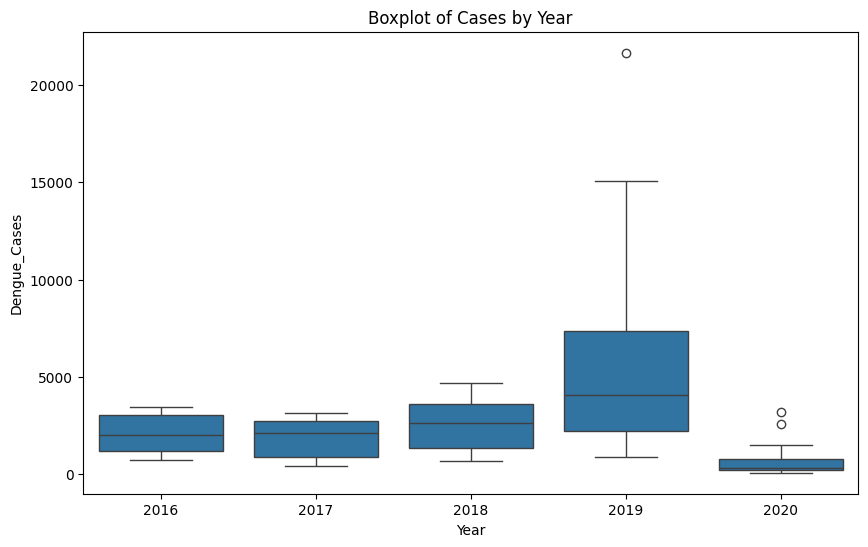

In [97]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Year', y='Dengue_Cases', data=Region_4_A)
plt.title("Boxplot of Cases by Year")
plt.show()

<h1 style="font-size: 20px; font-weight: bold";> 19. Kernel Density Estimate in Region 4-A</h1>

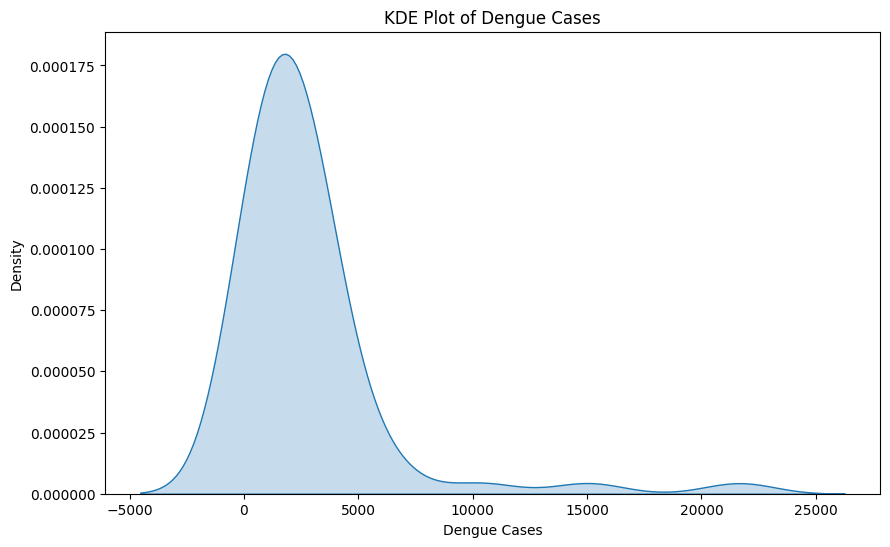

In [99]:
# KDE Plot: Distribution of 'Dengue Cases'
plt.figure(figsize=(10, 6))
sns.kdeplot(Region_4_A['Dengue_Cases'], shade=True)
plt.title("KDE Plot of Dengue Cases")
plt.xlabel("Dengue Cases")
plt.ylabel("Density")
plt.show()

In [100]:
skewness = Region_4_A['Dengue_Cases'].skew()

if skewness > 0:
    conclusion = "The data is positively skewed, with more lower-count Dengue cases and a tail towards higher counts."
elif skewness < 0:
    conclusion = "The data is negatively skewed, with more higher-count Dengue cases and a tail towards lower counts."
else:
    conclusion = "The data is symmetrically distributed, with a balanced spread of Dengue cases."

print(conclusion)

In [ ]:
<h1 style="font-size: 20px; font-weight: bold";> 20. Kernel Density Estimate in Region 4-A</h1>

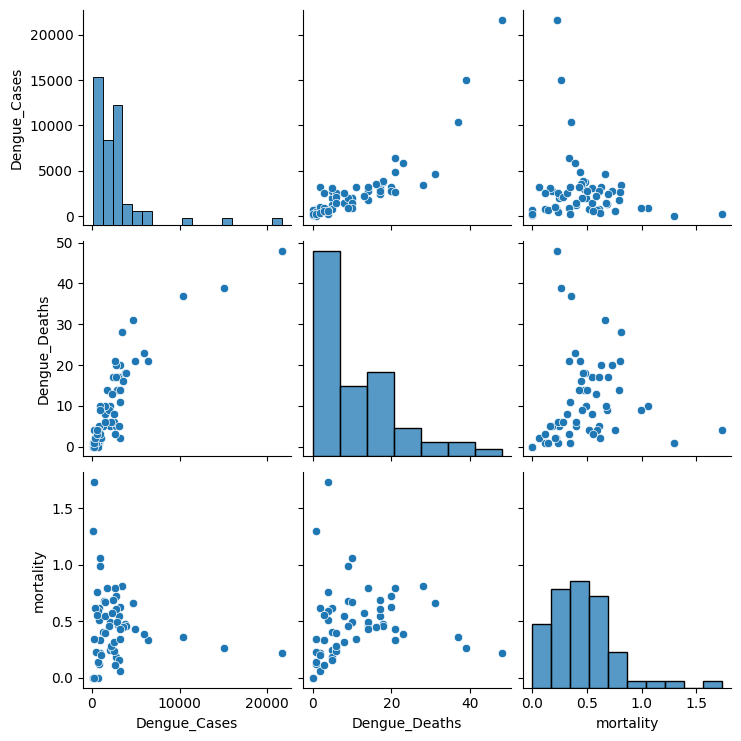

In [102]:
sns.pairplot(Region_4_A)
plt.show()


In [103]:
print("The figure above shows a pairplot of the variables in the 'Region_4_A' dataset.")